In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
data =np.array([["Joel_1", "'word', 'lord', 'came', 'joel', 'son', 'pethuel.hear', ',', 'old', 'men', ',', 'give', 'ear', ',', 'inhabitants', 'land', '.', 'days', ',', 'even', 'days', 'fathers', '?', 'tell', 'children', ',', 'let', 'children', 'tell', 'children', ',', 'children', 'another', 'generation.that', 'palmerworm', 'left', 'locust', 'eaten', ';', 'locust', 'left', 'cankerworm', 'eaten', ';', 'cankerworm', 'left', 'caterpillar', 'eaten.awake', ',', 'drunkards', ',', 'weep', ';', 'howl', ',', 'drinkers', 'wine', ',', 'new', 'wine', ';', 'cut', 'mouth.for', 'nation', 'come', 'land', ',', 'strong', ',', 'without', 'number', ',', 'whose', 'teeth', 'teeth', 'lion', ',', 'cheek', 'teeth', 'great', 'lion.he', 'laid', 'vine', 'waste', ',', 'barked', 'fig', 'tree', ':', 'made', 'clean', 'bore', ',', 'cast', 'away', ';', 'branches', 'thereof', 'made', 'white.lament', 'like', 'virgin', 'girded', 'sackcloth', 'husband', 'youth.the', 'meat', 'offering', 'drink', 'offering', 'cut', 'house', 'lord', ';', 'priests', ',', 'lord', ', 'ministers', ',', 'mourn.the', 'field', 'wasted', ',', 'land', 'mourns', ';', 'corn', 'wasted', ':', 'new', 'wine', 'dried', ',', 'oil', 'languishes.be', 'ashamed', ',', 'farmers', ';', 'howl', ',', 'vinedressers', ',', 'wheat', 'barley', ';', 'harvest', 'field', 'perished.the', 'vine', 'dried', ',', 'fig', 'tree', 'languishes', ';', 'pomegranate', 'tree', ',', 'palm', 'tree', 'also', ',', 'apple', 'tree', ',', 'even', 'trees', 'field', ',', 'withered', ':', 'joy', 'withered', 'away', 'sons', 'men.gird', ',', 'lament', ',', 'priests', ':', 'howl', ',', 'ministers', 'altar', ':', 'come', ',', 'lie', 'night', 'sackcloth', ',', 'ministers', 'god', ':', 'meat', 'offering', 'drink', 'offering', 'withheld', 'house', 'god.sanctify', 'fast', ',', 'call', 'solemn', 'assembly', ',', 'gather', 'elders', 'inhabitants', 'land', 'house', 'lord', 'god', ',', 'cry', 'lord', ',', 'alas', 'day', '!', 'day', 'lord', 'hand', ',', 'destruction', 'almighty', 'shall', 'come.is', 'meat', 'cut', 'eyes', ',', 'yes', ',', 'joy', 'gladness', 'house', 'god', '?', 'seed', 'rotten', 'clods', ',', 'garners', 'laid', 'desolate', ',', 'barns', 'broken', ';', 'corn', 'withered.how', 'beasts', 'groan', '!', 'herds', 'cattle', 'perplexed', ',', 'pasture', ';', 'yes', ',', 'flocks', 'sheep', 'made', 'desolate.o', 'lord', ',', 'cry', ':', 'fire', 'devoured', 'pastures', 'wilderness', ',', 'flame', 'burned', 'trees', 'field.the', 'beasts', 'field', 'cry', 'also', ':', 'rivers', 'waters', 'dried', ',', 'fire', 'devoured', 'pastures', 'wilderness', '.'"],
               ["Joel_2", "'blow', 'trumpet', 'zion', ',', 'sound', 'alarm', 'holy', 'mountain', ':', 'let', 'inhabitants', 'land', 'tremble', ':', 'day', 'lord', 'comes', ',', 'near', 'hand', ';', 'day', 'darkness', 'gloominess', ',', 'day', 'clouds', 'thick', 'darkness', ',', 'morning', 'spread', 'mountains', ':', 'great', 'people', 'strong', ';', 'ever', 'like', ',', 'neither', 'shall', ',', 'even', 'years', 'many', 'generations.a', 'fire', 'devours', ';', 'behind', 'flame', 'burns', ':', 'land', 'garden', 'eden', ',', 'behind', 'desolate', 'wilderness', ';', 'yes', ',', 'nothing', 'shall', 'escape', 'them.the', 'appearance', 'appearance', 'horses', ';', 'horsemen', ',', 'shall', 'run.like', 'noise', 'chariots', 'tops', 'mountains', 'shall', 'leap', ',', 'like', 'noise', 'flame', 'fire', 'devours', 'stubble', ',', 'strong', 'people', 'set', 'battle', 'arraybefore', 'face', 'people', 'shall', 'much', 'pained', ':', 'faces', 'shall', 'gather', 'blackness.they', 'shall', 'run', 'like', 'mighty', 'men', ';', 'shall', 'climb', 'wall', 'like', 'men', 'war', ';', 'shall', 'march', 'every', 'one', 'ways', ',', 'shall', 'break', 'ranks', ':', 'neither', 'shall', 'one', 'thrust', 'another', ';', 'shall', 'walk', 'every', 'one', 'path', ':', 'fall', 'sword', ',', 'shall', 'wounded.they', 'shall', 'run', 'fro', 'city', ';', 'shall', 'run', 'wall', ',', 'shall', 'climb', 'houses', ';', 'shall', 'enter', 'windows', 'like', 'thief.the', 'earth', 'shall', 'quake', ';', 'heavens', 'shall', 'tremble', ':', 'sun', 'moon', 'shall', 'dark', ',', 'stars', 'shall', 'withdraw', 'shining', ':', 'lord', 'shall', 'utter', 'voice', 'army', ':', 'camp', 'great', ':', 'strong', 'executes', 'word', ':', 'day', 'lord', 'great', 'terrible', ';', 'abide', '?', 'therefore', 'also', ',', 'said', 'lord', ',', 'turn', 'even', 'heart', ',', 'fasting', ',', 'weeping', ',', 'mourning', ':', 'rend', 'heart', ',', 'garments', ',', 'turn', 'lord', 'god', ':', 'gracious', 'merciful', ',', 'slow', 'anger', ',', 'great', 'kindness', ',', 'repents', 'evil.who', 'knows', 'return', 'repent', ',', 'leave', 'blessing', 'behind', ';', 'even', 'meat', 'offering', 'drink', 'offering', 'lord', 'god', '?', 'blow', 'trumpet', 'zion', ',', 'sanctify', 'fast', ',', 'call', 'solemn', 'assembly', ':', 'gather', 'people', ',', 'sanctify', 'congregation', ',', 'assemble', 'elders', ',', 'gather', 'children', ',', 'suck', 'breasts', ':', 'let', 'bridegroom', 'go', 'forth', 'chamber', ',', 'bride', 'closet.let', 'priests', ',', 'ministers', 'lord', ',', 'weep', 'porch', 'altar', ',', 'let', 'say', ',', 'spare', 'people', ',', 'lord', ',', 'give', 'heritage', 'reproach', ',', 'heathen', 'rule', ':', 'say', 'among', 'people', ',', 'god', '?', 'lord', 'jealous', 'land', ',', 'pity', 'people.yes', ',', 'lord', 'answer', 'say', 'people', ',', 'behold', ',', 'send', 'corn', ',', 'wine', ',', 'oil', ',', 'shall', 'satisfied', 'therewith', ':', 'make', 'reproach', 'among', 'heathen', ':', 'remove', 'far', 'northern', 'army', ',', 'drive', 'land', 'barren', 'desolate', ',', 'face', 'toward', 'east', 'sea', ',', 'hinder', 'part', 'toward', 'utmost', 'sea', ',', 'stink', 'shall', 'come', ',', 'ill', 'smell', 'shall', 'come', ',', 'done', 'great', 'things.fear', ',', 'land', ';', 'glad', 'rejoice', ':', 'lord', 'great', 'things.be', 'afraid', ',', 'beasts', 'field', ':', 'pastures', 'wilderness', 'spring', ',', 'tree', 'bears', 'fruit', ',', 'fig', 'tree', 'vine', 'yield', 'strength.be', 'glad', ',', 'children', 'zion', ',', 'rejoice', 'lord', 'god', ':', 'given', 'former', 'rain', 'moderately', ',', 'cause', 'come', 'rain', ',', 'former', 'rain', ',', 'latter', 'rain', 'first', 'month.and', 'floors', 'shall', 'full', 'wheat', ',', 'vats', 'shall', 'overflow', 'wine', 'oil.and', 'restore', 'years', 'locust', 'eaten', ',', 'cankerworm', ',', 'caterpillar', ',', 'palmerworm', ',', 'great', 'army', 'sent', 'among', 'you.and', 'shall', 'eat', 'plenty', ',', 'satisfied', ',', 'praise', 'name', 'lord', 'god', ',', 'dealt', 'wondrously', ':', 'people', 'shall', 'never', 'ashamed.and', 'shall', 'know', 'middle', 'israel', ',', 'lord', 'god', ',', 'none', 'else', ':', 'people', 'shall', 'never', 'ashamed.and', 'shall', 'come', 'pass', 'afterward', ',', 'pour', 'spirit', 'flesh', ';', 'sons', 'daughters', 'shall', 'prophesy', ',', 'old', 'men', 'shall', 'dream', 'dreams', ',', 'young', 'men', 'shall', 'see', 'visions', ':', 'also', 'servants', 'handmaids', 'days', 'pour', 'spirit.and', 'show', 'wonders', 'heavens', 'earth', ',', 'blood', ',', 'fire', ',', 'pillars', 'smoke.the', 'sun', 'shall', 'turned', 'darkness', ',', 'moon', 'blood', ',', 'great', 'terrible', 'day', 'lord', 'come.and', 'shall', 'come', 'pass', ',', 'whoever', 'shall', 'call', 'name', 'lord', 'shall', 'delivered', ':', 'mount', 'zion', 'jerusalem', 'shall', 'deliverance', ',', 'lord', 'said', ',', 'remnant', 'lord', 'shall', 'call', '.'"],
               ["Joel_3", "',', 'behold', ',', 'days', ',', 'time', ',', 'shall', 'bring', 'captivity', 'judah', 'jerusalem', ',', 'also', 'gather', 'nations', ',', 'bring', 'valley', 'jehoshaphat', ',', 'plead', 'people', 'heritage', 'israel', ',', 'scattered', 'among', 'nations', ',', 'parted', 'land.and', 'cast', 'lots', 'people', ';', 'given', 'boy', 'harlot', ',', 'sold', 'girl', 'wine', ',', 'might', 'drink.yes', ',', ',', 'tyre', ',', 'zidon', ',', 'coasts', 'palestine', '?', 'render', 'recompense', '?', 'recompense', ',', 'swiftly', 'speedily', 'return', 'recompense', 'head', ';', 'taken', 'silver', 'gold', ',', 'carried', 'temples', 'goodly', 'pleasant', 'things', ':', 'children', 'also', 'judah', 'children', 'jerusalem', 'sold', 'grecians', ',', 'might', 'remove', 'far', 'border.behold', ',', 'raise', 'place', 'sold', ',', 'return', 'recompense', 'head', ':', 'sell', 'sons', 'daughters', 'hand', 'children', 'judah', ',', 'shall', 'sell', 'sabeans', ',', 'people', 'far', ':', 'lord', 'spoken', 'it.proclaim', 'among', 'gentiles', ';', 'prepare', 'war', ',', 'wake', 'mighty', 'men', ',', 'let', 'men', 'war', 'draw', 'near', ';', 'let', 'come', ':', 'beat', 'plowshares', 'swords', 'pruning', 'hooks', 'spears', ':', 'let', 'weak', 'say', ',', 'strong.assemble', ',', 'come', ',', 'heathen', ',', 'gather', 'together', 'round', ':', 'thither', 'cause', 'mighty', 'ones', 'come', ',', 'lord.let', 'heathen', 'wakened', ',', 'come', 'valley', 'jehoshaphat', ':', 'sit', 'judge', 'heathen', 'round', 'about.put', 'sickle', ',', 'harvest', 'ripe', ':', 'come', ',', 'get', ';', 'press', 'full', ',', 'fats', 'overflow', ';', 'wickedness', 'great.multitudes', ',', 'multitudes', 'valley', 'decision', ':', 'day', 'lord', 'near', 'valley', 'decision.the', 'sun', 'moon', 'shall', 'darkened', ',', 'stars', 'shall', 'withdraw', 'shining.the', 'lord', 'also', 'shall', 'roar', 'zion', ',', 'utter', 'voice', 'jerusalem', ';', 'heavens', 'earth', 'shall', 'shake', ':', 'lord', 'hope', 'people', ',', 'strength', 'children', 'israel.so', 'shall', 'know', 'lord', 'god', 'dwelling', 'zion', ',', 'holy', 'mountain', ':', 'shall', 'jerusalem', 'holy', ',', 'shall', 'strangers', 'pass', 'more.and', 'shall', 'come', 'pass', 'day', ',', 'mountains', 'shall', 'drop', 'new', 'wine', ',', 'hills', 'shall', 'flow', 'milk', ',', 'rivers', 'judah', 'shall', 'flow', 'waters', ',', 'fountain', 'shall', 'come', 'forth', 'house', 'lord', ',', 'shall', 'water', 'valley', 'shittim.egypt', 'shall', 'desolation', ',', 'edom', 'shall', 'desolate', 'wilderness', ',', 'violence', 'children', 'judah', ',', 'shed', 'innocent', 'blood', 'land.but', 'judah', 'shall', 'dwell', 'ever', ',', 'jerusalem', 'generation', 'generation.for', 'cleanse', 'blood', 'cleansed', ':', 'lord', 'dwells', 'zion', '.'"],
               ["Amos_1", "'words', 'amos', ',', 'among', 'herdsmen', 'tekoa', ',', 'saw', 'concerning', 'israel', 'days', 'uzziah', 'king', 'judah', ',', 'days', 'jeroboam', 'son', 'joash', 'king', 'israel', ',', 'two', 'years', 'earthquake.and', 'said', ',', 'lord', 'roar', 'zion', ',', 'utter', 'voice', 'jerusalem', ';', 'habitations', 'shepherds', 'shall', 'mourn', ',', 'top', 'carmel', 'shall', 'wither.thus', 'said', 'lord', ';', 'three', 'transgressions', 'damascus', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'threshed', 'gilead', 'threshing', 'instruments', 'iron', ':', 'send', 'fire', 'house', 'hazael', ',', 'shall', 'devour', 'palaces', 'benhadad.i', 'break', 'also', 'bar', 'damascus', ',', 'cut', 'inhabitant', 'plain', 'aven', ',', 'holds', 'scepter', 'house', 'eden', ':', 'people', 'syria', 'shall', 'go', 'captivity', 'kir', ',', 'said', 'lord.thus', 'said', 'lord', ';', 'three', 'transgressions', 'gaza', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'carried', 'away', 'captive', 'whole', 'captivity', ',', 'deliver', 'edom', ':', 'send', 'fire', 'wall', 'gaza', ',', 'shall', 'devour', 'palaces', 'thereof', ':', 'cut', 'inhabitant', 'ashdod', ',', 'holds', 'scepter', 'ashkelon', ',', 'turn', 'hand', 'ekron', ':', 'remnant', 'philistines', 'shall', 'perish', ',', 'said', 'lord', 'god.thus', 'said', 'lord', ';', 'three', 'transgressions', 'tyrus', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'delivered', 'whole', 'captivity', 'edom', ',', 'remembered', 'brotherly', 'covenant', ':', 'send', 'fire', 'wall', 'tyrus', ',', 'shall', 'devour', 'palaces', 'thereof.thus', 'said', 'lord', ';', 'three', 'transgressions', 'edom', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'pursue', 'brother', 'sword', ',', 'cast', 'pity', ',', 'anger', 'tear', 'perpetually', ',', 'kept', 'wrath', 'ever', ':', 'send', 'fire', 'teman', ',', 'shall', 'devour', 'palaces', 'bozrah.thus', 'said', 'lord', ';', 'three', 'transgressions', 'children', 'ammon', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'ripped', 'women', 'child', 'gilead', ',', 'might', 'enlarge', 'border', ':', 'kindle', 'fire', 'wall', 'rabbah', ',', 'shall', 'devour', 'palaces', 'thereof', ',', 'shouting', 'day', 'battle', ',', 'tempest', 'day', 'whirlwind', ':', 'king', 'shall', 'go', 'captivity', ',', 'princes', 'together', ',', 'said', 'lord', '.'"],
               ["Amos_2", "'thus', 'said', 'lord', ';', 'three', 'transgressions', 'moab', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'burned', 'bones', 'king', 'edom', 'lime', ':', 'send', 'fire', 'moab', ',', 'shall', 'devour', 'palaces', 'kirioth', ':', 'moab', 'shall', 'die', 'tumult', ',', 'shouting', ',', 'sound', 'trumpet', ':', 'cut', 'judge', 'middle', 'thereof', ',', 'slay', 'princes', 'thereof', ',', 'said', 'lord.thus', 'said', 'lord', ';', 'three', 'transgressions', 'judah', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'despised', 'law', 'lord', ',', 'kept', 'commandments', ',', 'lies', 'caused', 'err', ',', 'fathers', 'walked', ':', 'send', 'fire', 'judah', ',', 'shall', 'devour', 'palaces', 'jerusalem.thus', 'said', 'lord', ';', 'three', 'transgressions', 'israel', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'sold', 'righteous', 'silver', ',', 'poor', 'pair', 'shoes', ';', 'pant', 'dust', 'earth', 'head', 'poor', ',', 'turn', 'aside', 'way', 'meek', ':', 'man', 'father', 'go', 'maid', ',', 'profane', 'holy', 'name', ':', 'lay', 'clothes', 'laid', 'pledge', 'every', 'altar', ',', 'drink', 'wine', 'condemned', 'house', 'god.yet', 'destroyed', 'amorite', ',', 'whose', 'height', 'like', 'height', 'cedars', ',', 'strong', 'oaks', ';', 'yet', 'destroyed', 'fruit', ',', 'roots', 'beneath.also', 'brought', 'land', 'egypt', ',', 'led', 'forty', 'years', 'wilderness', ',', 'possess', 'land', 'amorite.and', 'raised', 'sons', 'prophets', ',', 'young', 'men', 'nazarites', '.', 'even', 'thus', ',', 'children', 'israel', '?', 'said', 'lord.but', 'gave', 'nazarites', 'wine', 'drink', ';', 'commanded', 'prophets', ',', 'saying', ',', 'prophesy', 'not.behold', ',', 'pressed', ',', 'cart', 'pressed', 'full', 'sheaves.therefore', 'flight', 'shall', 'perish', 'swift', ',', 'strong', 'shall', 'strengthen', 'force', ',', 'neither', 'shall', 'mighty', 'deliver', ':', 'neither', 'shall', 'stand', 'handles', 'bow', ';', 'swift', 'foot', 'shall', 'deliver', ':', 'neither', 'shall', 'rides', 'horse', 'deliver', 'himself.and', 'courageous', 'among', 'mighty', 'shall', 'flee', 'away', 'naked', 'day', ',', 'said', 'lord', '.'"],
               ["Amos_3", "'hear', 'word', 'lord', 'spoken', ',', 'children', 'israel', ',', 'whole', 'family', 'brought', 'land', 'egypt', ',', 'saying', ',', 'known', 'families', 'earth', ':', 'therefore', 'punish', 'iniquities.can', 'two', 'walk', 'together', ',', 'except', 'agreed', '?', 'lion', 'roar', 'forest', ',', 'prey', '?', 'young', 'lion', 'cry', 'den', ',', 'taken', 'nothing', '?', 'bird', 'fall', 'snare', 'earth', ',', 'gin', '?', 'shall', 'one', 'take', 'snare', 'earth', ',', 'taken', 'nothing', '?', 'shall', 'trumpet', 'blown', 'city', ',', 'people', 'afraid', '?', 'shall', 'evil', 'city', ',', 'lord', 'done', '?', 'surely', 'lord', 'god', 'nothing', ',', 'reveals', 'secret', 'servants', 'prophets.the', 'lion', 'roared', ',', 'fear', '?', 'lord', 'god', 'spoken', ',', 'prophesy', '?', 'publish', 'palaces', 'ashdod', ',', 'palaces', 'land', 'egypt', ',', 'say', ',', 'assemble', 'mountains', 'samaria', ',', 'behold', 'great', 'tumults', 'middle', 'thereof', ',', 'oppressed', 'middle', 'thereof.for', 'know', 'right', ',', 'said', 'lord', ',', 'store', 'violence', 'robbery', 'palaces.therefore', 'thus', 'said', 'lord', 'god', ';', 'adversary', 'shall', 'even', 'round', 'land', ';', 'shall', 'bring', 'strength', ',', 'palaces', 'shall', 'spoiled.thus', 'said', 'lord', ';', 'shepherd', 'takes', 'mouth', 'lion', 'two', 'legs', ',', 'piece', 'ear', ';', 'shall', 'children', 'israel', 'taken', 'dwell', 'samaria', 'corner', 'bed', ',', 'damascus', 'couch.hear', ',', 'testify', 'house', 'jacob', ',', 'said', 'lord', 'god', ',', 'god', 'hosts', ',', 'day', 'shall', 'visit', 'transgressions', 'israel', 'also', 'visit', 'altars', 'bethel', ':', 'horns', 'altar', 'shall', 'cut', ',', 'fall', 'ground.and', 'smite', 'winter', 'house', 'summer', 'house', ';', 'houses', 'ivory', 'shall', 'perish', ',', 'great', 'houses', 'shall', 'end', ',', 'said', 'lord', '.'"],
               ["Amos_4", "'hear', 'word', ',', 'cows', 'bashan', ',', 'mountain', 'samaria', ',', 'oppress', 'poor', ',', 'crush', 'needy', ',', 'say', 'masters', ',', 'bring', ',', 'let', 'us', 'drink.the', 'lord', 'god', 'sworn', 'holiness', ',', ',', 'see', ',', 'days', 'shall', 'come', ',', 'take', 'away', 'hooks', ',', 'posterity', 'fishhooks.and', 'shall', 'go', 'breaches', ',', 'every', 'cow', ';', 'shall', 'cast', 'palace', ',', 'said', 'lord.come', 'bethel', ',', 'transgress', ';', 'gilgal', 'multiply', 'transgression', ';', 'bring', 'sacrifices', 'every', 'morning', ',', 'tithes', 'three', 'years', ':', 'offer', 'sacrifice', 'thanksgiving', 'leaven', ',', 'proclaim', 'publish', 'free', 'offerings', ':', 'likes', ',', 'children', 'israel', ',', 'said', 'lord', 'god.and', 'also', 'given', 'cleanness', 'teeth', 'cities', ',', 'want', 'bread', 'places', ':', 'yet', 'returned', ',', 'said', 'lord.and', 'also', 'withheld', 'rain', ',', 'yet', 'three', 'months', 'harvest', ':', 'caused', 'rain', 'one', 'city', ',', 'caused', 'rain', 'another', 'city', ':', 'one', 'piece', 'rained', ',', 'piece', 'whereupon', 'rained', 'withered.so', 'two', 'three', 'cities', 'wandered', 'one', 'city', ',', 'drink', 'water', ';', 'satisfied', ':', 'yet', 'returned', ',', 'said', 'lord.i', 'smitten', 'blasting', 'mildew', ':', 'gardens', 'vineyards', 'fig', 'trees', 'olive', 'trees', 'increased', ',', 'palmerworm', 'devoured', ':', 'yet', 'returned', ',', 'said', 'lord.i', 'sent', 'among', 'pestilence', 'manner', 'egypt', ':', 'young', 'men', 'slain', 'sword', ',', 'taken', 'away', 'horses', ';', 'made', 'stink', 'camps', 'come', 'nostrils', ':', 'yet', 'returned', ',', 'said', 'lord.i', 'overthrown', ',', 'god', 'overthrew', 'sodom', 'gomorrah', ',', 'firebrand', 'plucked', 'burning', ':', 'yet', 'returned', ',', 'said', 'lord.therefore', 'thus', ',', 'israel', ':', ',', 'prepare', 'meet', 'god', ',', 'israel.for', ',', 'see', ',', 'forms', 'mountains', ',', 'creates', 'wind', ',', 'declares', 'man', 'thought', ',', 'makes', 'morning', 'darkness', ',', 'treads', 'high', 'places', 'earth', ',', 'lord', ',', 'god', 'hosts', ',', 'name', '.'"],
               ["Amos_5", "'hear', 'word', 'take', ',', 'even', 'lamentation', ',', 'house', 'israel.the', 'virgin', 'israel', 'fallen', ';', 'shall', 'rise', ':', 'forsaken', 'land', ';', 'none', 'raise', 'up.for', 'thus', 'said', 'lord', 'god', ';', 'city', 'went', 'thousand', 'shall', 'leave', 'hundred', ',', 'went', 'forth', 'hundred', 'shall', 'leave', 'ten', ',', 'house', 'israel.for', 'thus', 'said', 'lord', 'house', 'israel', ',', 'seek', ',', 'shall', 'live', ':', 'seek', 'bethel', ',', 'enter', 'gilgal', ',', 'pass', 'beersheba', ':', 'gilgal', 'shall', 'surely', 'go', 'captivity', ',', 'bethel', 'shall', 'come', 'nothing.seek', 'lord', ',', 'shall', 'live', ';', 'lest', 'break', 'like', 'fire', 'house', 'joseph', ',', 'devour', ',', 'none', 'quench', 'bethel.you', 'turn', 'judgment', 'wormwood', ',', 'leave', 'righteousness', 'earth', ',', 'seek', 'makes', 'seven', 'stars', 'orion', ',', 'turns', 'shadow', 'death', 'morning', ',', 'makes', 'day', 'dark', 'night', ':', 'calls', 'waters', 'sea', ',', 'pours', 'face', 'earth', ':', 'lord', 'name', ':', 'strengthens', 'spoiled', 'strong', ',', 'spoiled', 'shall', 'come', 'fortress.they', 'hate', 'rebukes', 'gate', ',', 'abhor', 'speaks', 'uprightly.for', 'much', 'therefore', 'treading', 'poor', ',', 'take', 'burdens', 'wheat', ':', 'built', 'houses', 'hewn', 'stone', ',', 'shall', 'dwell', ';', 'planted', 'pleasant', 'vineyards', ',', 'shall', 'drink', 'wine', 'them.for', 'know', 'manifold', 'transgressions', 'mighty', 'sins', ':', 'afflict', ',', 'take', 'bribe', ',', 'turn', 'aside', 'poor', 'gate', 'right.therefore', 'prudent', 'shall', 'keep', 'silence', 'time', ';', 'evil', 'time.seek', 'good', ',', 'evil', ',', 'may', 'live', ':', 'lord', ',', 'god', 'hosts', ',', 'shall', ',', 'spoken.hate', 'evil', ',', 'love', 'good', ',', 'establish', 'judgment', 'gate', ':', 'may', 'lord', 'god', 'hosts', 'gracious', 'remnant', 'joseph.therefore', 'lord', ',', 'god', 'hosts', ',', 'lord', ',', 'said', 'thus', ';', 'wailing', 'shall', 'streets', ';', 'shall', 'say', 'highways', ',', 'alas', '!', 'alas', '!', 'shall', 'call', 'farmer', 'mourning', ',', 'skillful', 'lamentation', 'wailing.and', 'vineyards', 'shall', 'wailing', ':', 'pass', ',', 'said', 'lord.woe', 'desire', 'day', 'lord', '!', 'end', '?', 'day', 'lord', 'darkness', ',', 'light.as', 'man', 'flee', 'lion', ',', 'bear', 'met', ';', 'went', 'house', ',', 'leaned', 'hand', 'wall', ',', 'serpent', 'bit', 'him.shall', 'day', 'lord', 'darkness', ',', 'light', '?', 'even', 'dark', ',', 'brightness', '?', 'hate', ',', 'despise', 'feast', 'days', ',', 'smell', 'solemn', 'assemblies.though', 'offer', 'burnt', 'offerings', 'meat', 'offerings', ',', 'accept', ':', 'neither', 'regard', 'peace', 'offerings', 'fat', 'beasts.take', 'away', 'noise', 'songs', ';', 'hear', 'melody', 'viols.but', 'let', 'judgment', 'run', 'waters', ',', 'righteousness', 'mighty', 'stream.have', 'offered', 'sacrifices', 'offerings', 'wilderness', 'forty', 'years', ',', 'house', 'israel', '?', 'borne', 'tabernacle', 'moloch', 'chiun', 'images', ',', 'star', 'god', ',', 'made', 'yourselves.therefore', 'cause', 'go', 'captivity', 'beyond', 'damascus', ',', 'said', 'lord', ',', 'whose', 'name', 'god', 'hosts', '.'"],
               ["Amos_6", "'woe', 'ease', 'zion', ',', 'trust', 'mountain', 'samaria', ',', 'named', 'chief', 'nations', ',', 'house', 'israel', 'came', '!', 'pass', 'calneh', ',', 'see', ';', 'go', 'hamath', 'great', ':', 'go', 'gath', 'philistines', ':', 'better', 'kingdoms', '?', 'border', 'greater', 'border', '?', 'put', 'far', 'away', 'evil', 'day', ',', 'cause', 'seat', 'violence', 'come', 'near', ';', 'lie', 'beds', 'ivory', ',', 'stretch', 'couches', ',', 'eat', 'lambs', 'flock', ',', 'calves', 'middle', 'stall', ';', 'chant', 'sound', 'viol', ',', 'invent', 'instruments', 'music', ',', 'like', 'david', ';', 'drink', 'wine', 'bowls', ',', 'anoint', 'chief', 'ointments', ':', 'grieved', 'affliction', 'joseph.therefore', 'shall', 'go', 'captive', 'first', 'go', 'captive', ',', 'banquet', 'stretched', 'shall', 'removed.the', 'lord', 'god', 'sworn', ',', 'said', 'lord', 'god', 'hosts', ',', 'abhor', 'excellency', 'jacob', ',', 'hate', 'palaces', ':', 'therefore', 'deliver', 'city', 'therein.and', 'shall', 'come', 'pass', ',', 'remain', 'ten', 'men', 'one', 'house', ',', 'shall', 'die.and', 'man', ', 'uncle', 'shall', 'take', ',', 'burns', ',', 'bring', 'bones', 'house', ',', 'shall', 'say', 'sides', 'house', ',', 'yet', '?', 'shall', 'say', ',', '.', 'shall', 'say', ',', 'hold', 'tongue', ':', 'may', 'make', 'mention', 'name', 'lord.for', ',', 'behold', ',', 'lord', 'commands', ',', 'smite', 'great', 'house', 'breaches', ',', 'little', 'house', 'clefts.shall', 'horses', 'run', 'rock', '?', 'one', 'plow', 'oxen', '?', 'turned', 'judgment', 'gall', ',', 'fruit', 'righteousness', 'hemlock', ':', 'rejoice', 'thing', 'nothing', ',', 'say', ',', 'taken', 'us', 'horns', 'strength', '?', ',', 'behold', ',', 'raise', 'nation', ',', 'house', 'israel', ',', 'said', 'lord', 'god', 'hosts', ';', 'shall', 'afflict', 'entering', 'hemath', 'river', 'wilderness', '.'"],
               ["Amos_7", "'thus', 'lord', 'god', 'showed', ';', ',', 'behold', ',', 'formed', 'grasshoppers', 'beginning', 'shooting', 'latter', 'growth', ';', ',', 'see', ',', 'latter', 'growth', 'king', ', 'mowings.and', 'came', 'pass', ',', 'made', 'end', 'eating', 'grass', 'land', ',', 'said', ',', 'lord', 'god', ',', 'forgive', ',', 'beseech', ':', 'shall', 'jacob', 'arise', '?', 'small.the', 'lord', 'repented', ':', 'shall', ',', 'said', 'lord.thus', 'lord', 'god', 'showed', ':', ',', 'behold', ',', 'lord', 'god', 'called', 'contend', 'fire', ',', 'devoured', 'great', 'deep', ',', 'eat', 'part.then', 'said', ',', 'lord', 'god', ',', 'cease', ',', 'beseech', ':', 'shall', 'jacob', 'arise', '?', 'small.the', 'lord', 'repented', ':', 'also', 'shall', ',', 'said', 'lord', 'god.thus', 'showed', ':', ',', 'behold', ',', 'lord', 'stood', 'wall', 'made', 'plumb', 'line', ',', 'plumb', 'line', 'hand.and', 'lord', 'said', ',', 'amos', ',', 'see', '?', 'said', ',', 'plumb', 'line', '.', 'said', 'lord', ',', 'behold', ',', 'set', 'plumb', 'line', 'middle', 'people', 'israel', ':', 'pass', ':', 'high', 'places', 'isaac', 'shall', 'desolate', ',', 'sanctuaries', 'israel', 'shall', 'laid', 'waste', ';', 'rise', 'house', 'jeroboam', 'sword.then', 'amaziah', 'priest', 'bethel', 'sent', 'jeroboam', 'king', 'israel', ',', 'saying', ',', 'amos', 'conspired', 'middle', 'house', 'israel', ':', 'land', 'able', 'bear', 'words.for', 'thus', 'amos', 'said', ',', 'jeroboam', 'shall', 'die', 'sword', ',', 'israel', 'shall', 'surely', 'led', 'away', 'captive', 'land.also', 'amaziah', 'said', 'amos', ',', 'seer', ',', 'go', ',', 'flee', 'away', 'land', 'judah', ',', 'eat', 'bread', ',', 'prophesy', ':', 'prophesy', 'bethel', ':', 'king', ', 'chapel', ',', 'king', ', 'court.then', 'answered', 'amos', ',', 'said', 'amaziah', ',', 'prophet', ',', 'neither', 'prophet', ', 'son', ';', 'herdsman', ',', 'gatherer', 'sycomore', 'fruit', ':', 'lord', 'took', 'followed', 'flock', ',', 'lord', 'said', ',', 'go', ',', 'prophesy', 'people', 'israel.now', 'therefore', 'hear', 'word', 'lord', ':', 'say', ',', 'prophesy', 'israel', ',', 'drop', 'word', 'house', 'isaac.therefore', 'thus', 'said', 'lord', ';', 'wife', 'shall', 'harlot', 'city', ',', 'sons', 'daughters', 'shall', 'fall', 'sword', ',', 'land', 'shall', 'divided', 'line', ';', 'shall', 'die', 'polluted', 'land', ':', 'israel', 'shall', 'surely', 'go', 'captivity', 'forth', 'land', '.'"],
               ["Amos_8", "'thus', 'lord', 'god', 'showed', ':', 'behold', 'basket', 'summer', 'fruit.and', 'said', ',', 'amos', ',', 'see', '?', 'said', ',', 'basket', 'summer', 'fruit', '.', 'said', 'lord', ',', 'end', 'come', 'people', 'israel', ';', 'pass', 'more.and', 'songs', 'temple', 'shall', 'howlings', 'day', ',', 'said', 'lord', 'god', ':', 'shall', 'many', 'dead', 'bodies', 'every', 'place', ';', 'shall', 'cast', 'forth', 'silence.hear', ',', 'swallow', 'needy', ',', 'even', 'make', 'poor', 'land', 'fail', ',', 'saying', ',', 'new', 'moon', 'gone', ',', 'may', 'sell', 'corn', '?', 'sabbath', ',', 'may', 'set', 'forth', 'wheat', ',', 'making', 'ephah', 'small', ',', 'shekel', 'great', ',', 'falsifying', 'balances', 'deceit', '?', 'may', 'buy', 'poor', 'silver', ',', 'needy', 'pair', 'shoes', ';', 'yes', ',', 'sell', 'refuse', 'wheat', '?', 'lord', 'sworn', 'excellency', 'jacob', ',', 'surely', 'never', 'forget', 'works.shall', 'land', 'tremble', ',', 'every', 'one', 'mourn', 'dwells', 'therein', '?', 'shall', 'rise', 'wholly', 'flood', ';', 'shall', 'cast', 'drowned', ',', 'flood', 'egypt.and', 'shall', 'come', 'pass', 'day', ',', 'said', 'lord', 'god', ',', 'cause', 'sun', 'go', 'noon', ',', 'darken', 'earth', 'clear', 'day', ':', 'turn', 'feasts', 'mourning', ',', 'songs', 'lamentation', ';', 'bring', 'sackcloth', 'loins', ',', 'baldness', 'every', 'head', ';', 'make', 'mourning', 'son', ',', 'end', 'thereof', 'bitter', 'day.behold', ',', 'days', 'come', ',', 'said', 'lord', 'god', ',', 'send', 'famine', 'land', ',', 'famine', 'bread', ',', 'thirst', 'water', ',', 'hearing', 'words', 'lord', ':', 'shall', 'wander', 'sea', 'sea', ',', 'north', 'even', 'east', ',', 'shall', 'run', 'fro', 'seek', 'word', 'lord', ',', 'shall', 'find', 'it.in', 'day', 'shall', 'fair', 'virgins', 'young', 'men', 'faint', 'thirst.they', 'swear', 'sin', 'samaria', ',', 'say', ',', 'god', ',', 'dan', ',', 'lives', ';', ',', 'manner', 'beersheba', 'lives', ';', 'even', 'shall', 'fall', ',', 'never', 'rise', '.'"],
               ["Amos_9", "'saw', 'lord', 'standing', 'altar', ':', 'said', ',', 'smite', 'lintel', 'door', ',', 'posts', 'may', 'shake', ':', 'cut', 'head', ',', ';', 'slay', 'last', 'sword', ':', 'flees', 'shall', 'flee', 'away', ',', 'escapes', 'shall', 'delivered.though', 'dig', 'hell', ',', 'shall', 'hand', 'take', ';', 'though', 'climb', 'heaven', ',', 'bring', ':', 'though', 'hide', 'top', 'carmel', ',', 'search', 'take', ';', 'though', 'hid', 'sight', 'bottom', 'sea', ',', 'command', 'serpent', ',', 'shall', 'bite', ':', 'though', 'go', 'captivity', 'enemies', ',', 'command', 'sword', ',', 'shall', 'slay', ':', 'set', 'eyes', 'evil', ',', 'good.and', 'lord', 'god', 'hosts', 'touches', 'land', ',', 'shall', 'melt', ',', 'dwell', 'therein', 'shall', 'mourn', ':', 'shall', 'rise', 'wholly', 'like', 'flood', ';', 'shall', 'drowned', ',', 'flood', 'egypt.it', 'builds', 'stories', 'heaven', ',', 'founded', 'troop', 'earth', ';', 'calls', 'waters', 'sea', ',', 'pours', 'face', 'earth', ':', 'lord', 'name.are', 'children', 'ethiopians', ',', 'children', 'israel', '?', 'said', 'lord', '.', 'brought', 'israel', 'land', 'egypt', '?', 'philistines', 'caphtor', ',', 'syrians', 'kir', '?', 'behold', ',', 'eyes', 'lord', 'god', 'sinful', 'kingdom', ',', 'destroy', 'face', 'earth', ';', 'saving', 'utterly', 'destroy', 'house', 'jacob', ',', 'said', 'lord.for', ',', 'see', ',', 'command', ',', 'sift', 'house', 'israel', 'among', 'nations', ',', 'like', 'corn', 'sifted', 'sieve', ',', 'yet', 'shall', 'least', 'grain', 'fall', 'earth.all', 'sinners', 'people', 'shall', 'die', 'sword', ',', 'say', ',', 'evil', 'shall', 'overtake', 'prevent', 'us.in', 'day', 'raise', 'tabernacle', 'david', 'fallen', ',', 'close', 'breaches', 'thereof', ';', 'raise', 'ruins', ',', 'build', 'days', 'old', ':', 'may', 'possess', 'remnant', 'edom', ',', 'heathen', ',', 'called', 'name', ',', 'said', 'lord', 'this.behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'plowman', 'shall', 'overtake', 'reaper', ',', 'treader', 'grapes', 'sows', 'seed', ';', 'mountains', 'shall', 'drop', 'sweet', 'wine', ',', 'hills', 'shall', 'melt.and', 'bring', 'captivity', 'people', 'israel', ',', 'shall', 'build', 'waste', 'cities', ',', 'inhabit', ';', 'shall', 'plant', 'vineyards', ',', 'drink', 'wine', 'thereof', ';', 'shall', 'also', 'make', 'gardens', ',', 'eat', 'fruit', 'them.and', 'plant', 'land', ',', 'shall', 'pulled', 'land', 'given', ',', 'said', 'lord', 'god', '.'"]])

In [7]:
df = pd.DataFrame(data, index=range(100,112),columns=['Autor', 'Livro'])

In [9]:
print(df)

      Autor                                              Livro
100  Joel_1  'word', 'lord', 'came', 'joel', 'son', 'pethue...
101  Joel_2  'blow', 'trumpet', 'zion', ',', 'sound', 'alar...
102  Joel_3  ',', 'behold', ',', 'days', ',', 'time', ',', ...
103  Amos_1  'words', 'amos', ',', 'among', 'herdsmen', 'te...
104  Amos_2  'thus', 'said', 'lord', ';', 'three', 'transgr...
105  Amos_3  'hear', 'word', 'lord', 'spoken', ',', 'childr...
106  Amos_4  'hear', 'word', ',', 'cows', 'bashan', ',', 'm...
107  Amos_5  'hear', 'word', 'take', ',', 'even', 'lamentat...
108  Amos_6  'woe', 'ease', 'zion', ',', 'trust', 'mountain...
109  Amos_7  'thus', 'lord', 'god', 'showed', ';', ',', 'be...
110  Amos_8  'thus', 'lord', 'god', 'showed', ':', 'behold'...
111  Amos_9  'saw', 'lord', 'standing', 'altar', ':', 'said...


In [10]:
corpus = df['Livro'].tolist()

In [11]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

12 rows


,0,1,2,3,4,5,6,7,8,9,10,11
devoured pastures wilderness,0.128871,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fire devoured pastures,0.128871,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
meat offering drink,0.110676,0.039496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
offering drink offering,0.110676,0.039496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alas day day,0.064436,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
almighty shall come,0.064436,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also apple tree,0.064436,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also rivers waters,0.064436,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
altar come lie,0.064436,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
another generation that,0.064436,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [13]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [14]:
k = 4
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


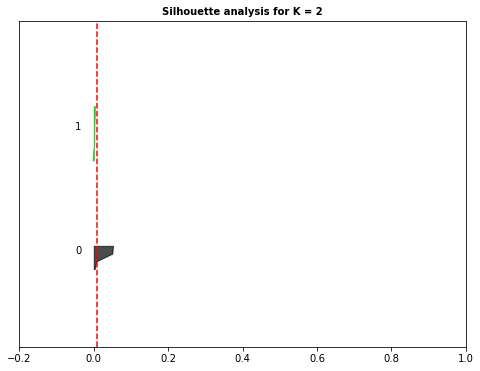

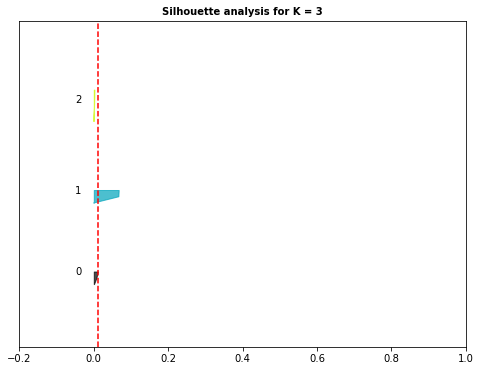

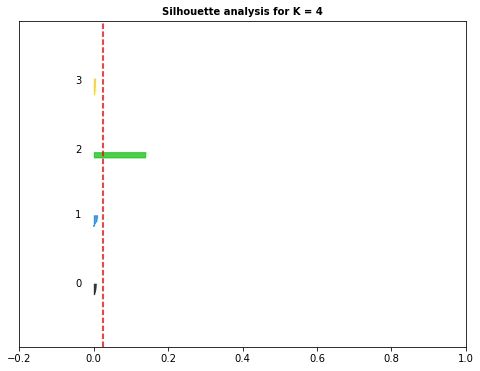

In [15]:
silhouette(kmeans_results, final_df, plot=True)

In [16]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

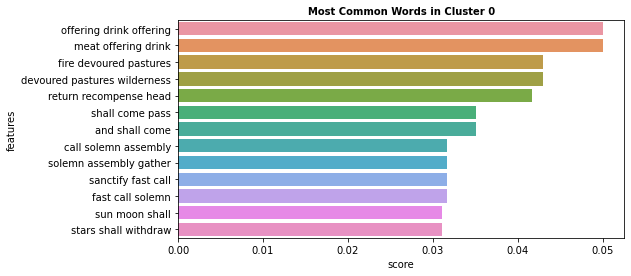

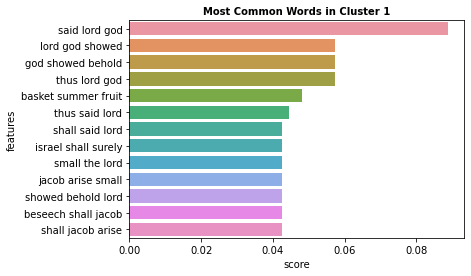

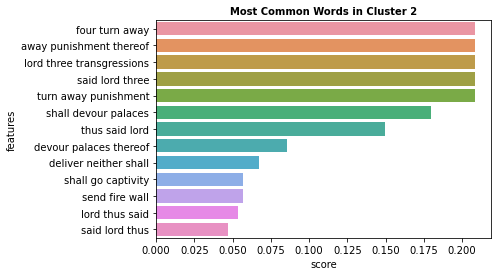

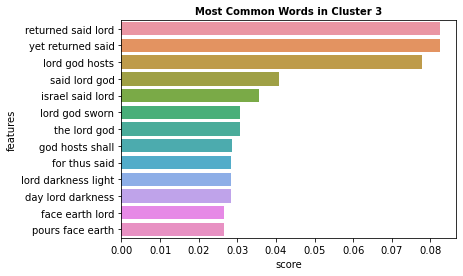

In [17]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [18]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

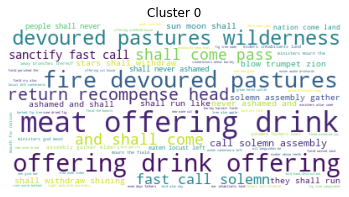

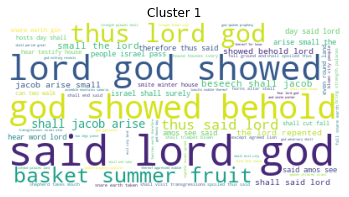

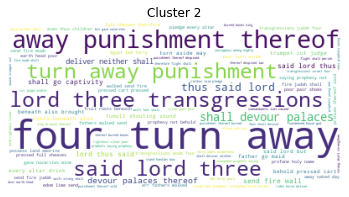

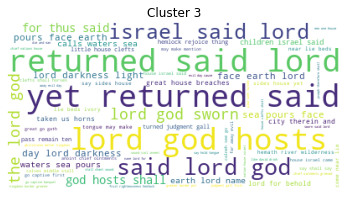

In [19]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [20]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Joel_1,"'word', 'lord', 'came', 'joel', 'son', 'pethue...",0
101,Joel_2,"'blow', 'trumpet', 'zion', ',', 'sound', 'alar...",0
102,Joel_3,"',', 'behold', ',', 'days', ',', 'time', ',', ...",0
103,Amos_1,"'words', 'amos', ',', 'among', 'herdsmen', 'te...",2
104,Amos_2,"'thus', 'said', 'lord', ';', 'three', 'transgr...",2


In [21]:
print(df)

      Autor                                              Livro  label
100  Joel_1  'word', 'lord', 'came', 'joel', 'son', 'pethue...      0
101  Joel_2  'blow', 'trumpet', 'zion', ',', 'sound', 'alar...      0
102  Joel_3  ',', 'behold', ',', 'days', ',', 'time', ',', ...      0
103  Amos_1  'words', 'amos', ',', 'among', 'herdsmen', 'te...      2
104  Amos_2  'thus', 'said', 'lord', ';', 'three', 'transgr...      2
105  Amos_3  'hear', 'word', 'lord', 'spoken', ',', 'childr...      1
106  Amos_4  'hear', 'word', ',', 'cows', 'bashan', ',', 'm...      3
107  Amos_5  'hear', 'word', 'take', ',', 'even', 'lamentat...      3
108  Amos_6  'woe', 'ease', 'zion', ',', 'trust', 'mountain...      3
109  Amos_7  'thus', 'lord', 'god', 'showed', ';', ',', 'be...      1
110  Amos_8  'thus', 'lord', 'god', 'showed', ':', 'behold'...      1
111  Amos_9  'saw', 'lord', 'standing', 'altar', ':', 'said...      3
